# Análise Exploratória dos dados

## Importação dos pacotes

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold, f_classif

import re
import warnings

In [2]:
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

## Importação das funções locais

In [3]:
import os
os.chdir("../funcoes")
from feature import features_equal_mean, features_high_corr, features_chi2, binary_features, features_equal_var_mean
from my_plot import labs, annot_bar
os.chdir("../notebooks")

In [4]:
help(binary_features)

Help on function binary_features in module feature:

binary_features(data)



## Leitura dos dados Pré-processados

In [5]:
df = pd.read_csv('../dados/dados_preprocessados/Kaggle_Sirio_Libanes_ICU_Prediction.csv')

## Primeiras Impressões

In [6]:
df.head()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
1,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,1
2,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
3,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.882353,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0
4,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.976190,-0.979798,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Columns: 229 entries, AGE_ABOVE65 to ICU
dtypes: float64(225), int64(3), object(1)
memory usage: 628.1+ KB


In [8]:
df.describe()

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.458689,0.381766,0.105413,0.022792,0.091168,0.019943,0.128205,0.042735,0.193732,0.162393,...,-0.961957,-0.965134,-0.985323,-0.962986,-0.958804,-0.976353,-0.964289,-0.965628,-0.985349,0.461538
std,0.499002,0.486513,0.307523,0.149453,0.288259,0.140004,0.334795,0.202548,0.395786,0.369338,...,0.110550,0.086235,0.032677,0.106265,0.117708,0.059678,0.095232,0.084406,0.033063,0.499230
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-0.979798,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.980333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-0.058824,-0.238095,-0.757576,0.130435,0.378657,-0.535878,-0.268817,-0.285468,-0.732438,1.000000


In [9]:
df.iloc[:, ~df.columns.isin(df.describe().columns)]

,AGE_PERCENTIL
0,60th
1,10th
2,40th
3,10th
4,10th
...,...
346,40th
347,Above 90th
348,50th
349,40th


## Análise variáveis categóricas

In [10]:
percentil_prop = df.groupby('AGE_PERCENTIL')['ICU'].value_counts(normalize=True).reset_index(name='Prop')

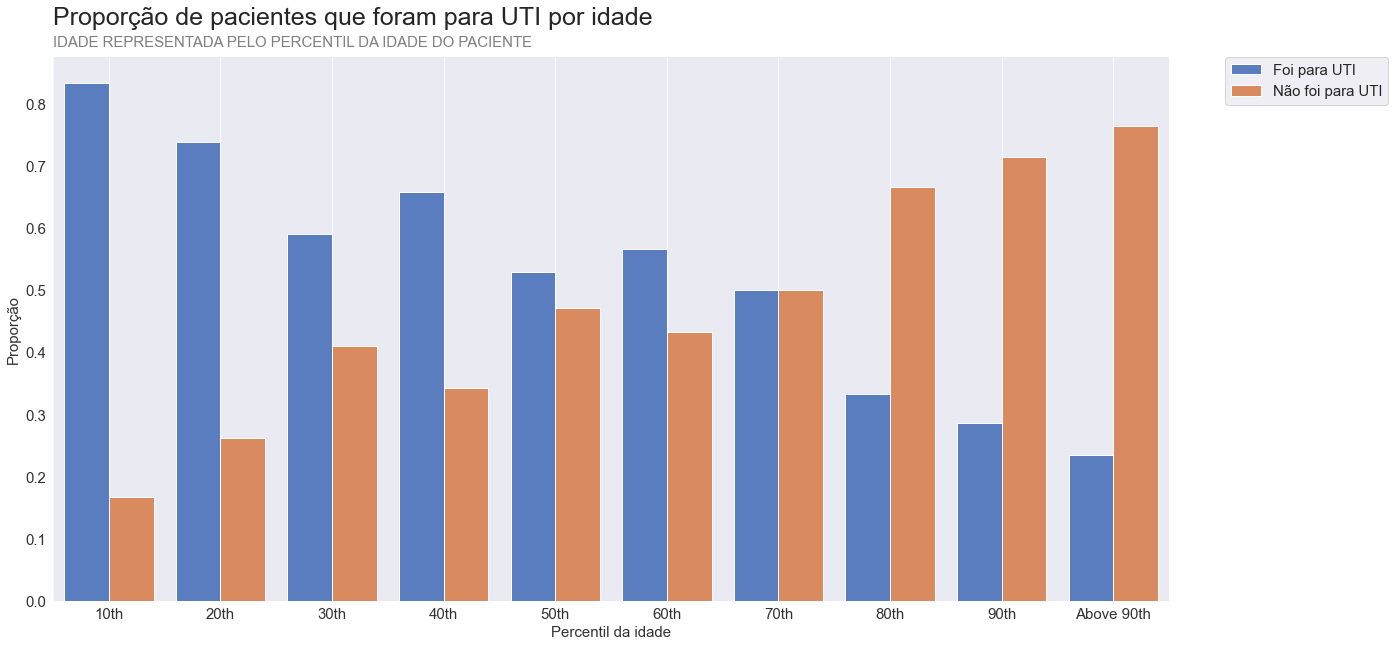

In [11]:
fig, ax = plt.subplots(figsize=(20,10)) 

sns.barplot(data=percentil_prop, y='Prop', x='AGE_PERCENTIL', hue='ICU', ax=ax, palette='muted')
labs(title='Proporção de pacientes que foram para UTI por idade', subtitle='IDADE REPRESENTADA PELO PERCENTIL DA IDADE DO PACIENTE',
     xlabel='Percentil da idade', ylabel='Proporção',ax=ax)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], ['Foi para UTI', 'Não foi para UTI'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.show()

## Análise das colunas binárias

In [12]:
binary_cols = binary_features(df)
binary_cols

['AGE_ABOVE65',
 'GENDER',
 'DISEASE GROUPING 1',
 'DISEASE GROUPING 2',
 'DISEASE GROUPING 3',
 'DISEASE GROUPING 4',
 'DISEASE GROUPING 5',
 'DISEASE GROUPING 6',
 'HTN',
 'IMMUNOCOMPROMISED',
 'OTHER',
 'ICU']

In [13]:
diseases = [col for col in binary_cols if re.match(r'DISEASE.*', col) or col=='ICU']
gender = ['GENDER', 'ICU']
above65 = ['AGE_ABOVE65', 'ICU']
others = ['HTN','IMMUNOCOMPROMISED','OTHER', 'ICU']

### Colunas relacionadas as doenças dos pacientes

In [14]:
diseases_melt  = pd.melt(df[diseases], id_vars='ICU')
diseases_prop = diseases_melt.groupby(['variable','value'])['ICU'].mean().reset_index(name='Prop')

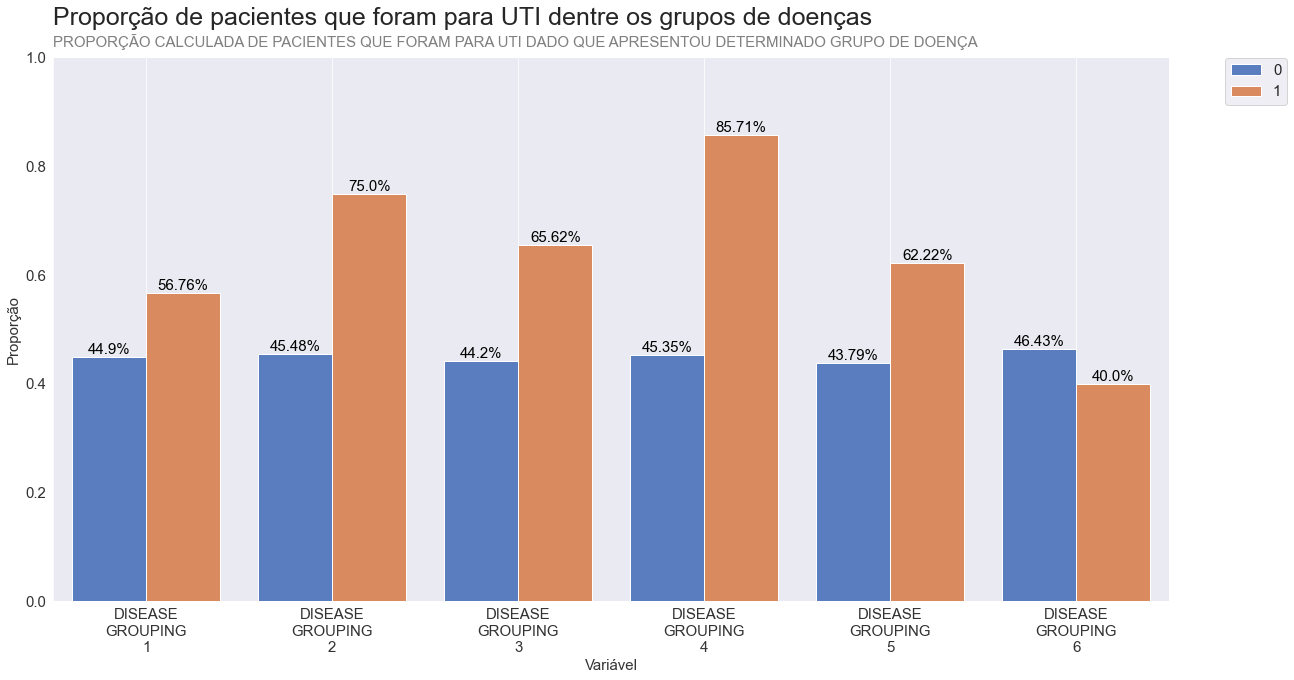

In [15]:
fig, ax = plt.subplots(figsize=(20,10)) 

sns.barplot(data=diseases_prop, y='Prop', x='variable', hue='value', ax=ax, palette='muted')
labs(title='Proporção de pacientes que foram para UTI dentre os grupos de doenças', 
     subtitle='PROPORÇÃO CALCULADA DE PACIENTES QUE FORAM PARA UTI DADO QUE APRESENTOU DETERMINADO GRUPO DE DOENÇA',
     xlabel='Variável', ylabel='Proporção',ax=ax)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], ['0','1'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.xticks(range(6),labels=diseases_prop['variable'].str.split(r'_| ').str.join('\n').unique())
annot_bar(diseases_prop, ax)
plt.ylim([0,1])
plt.show()

In [16]:
others_melt  = pd.melt(df[others], id_vars='ICU')
others_prop = others_melt.groupby(['variable','value'])['ICU'].mean().reset_index(name='Prop')

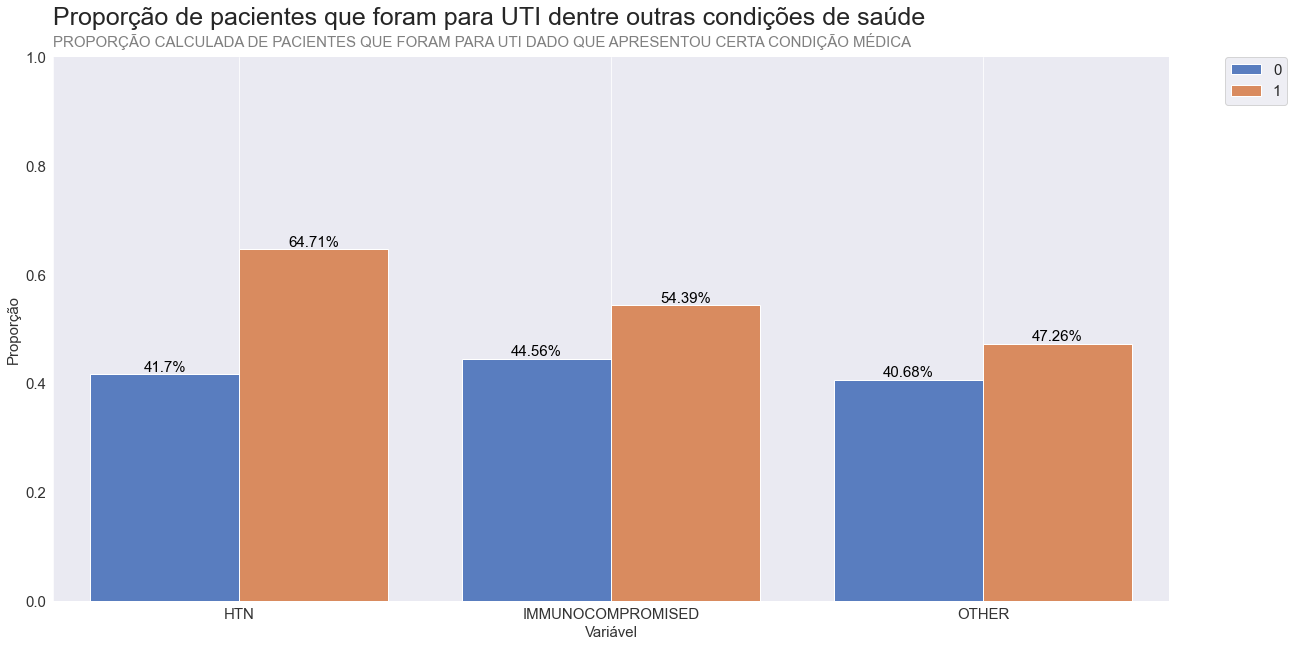

In [17]:
fig, ax = plt.subplots(figsize=(20,10)) 

sns.barplot(data=others_prop, y='Prop', x='variable', hue='value', ax=ax, palette='muted')
labs(title='Proporção de pacientes que foram para UTI dentre outras condições de saúde', 
     subtitle='PROPORÇÃO CALCULADA DE PACIENTES QUE FORAM PARA UTI DADO QUE APRESENTOU CERTA CONDIÇÃO MÉDICA',
     xlabel='Variável', ylabel='Proporção',ax=ax)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], ['0','1'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
annot_bar(others_prop, ax)
plt.ylim([0,1])
plt.show()

In [18]:
gender_melt  = pd.melt(df[gender], id_vars='ICU')
gender_prop = gender_melt.groupby(['variable','value'])['ICU'].mean().reset_index(name='Prop')

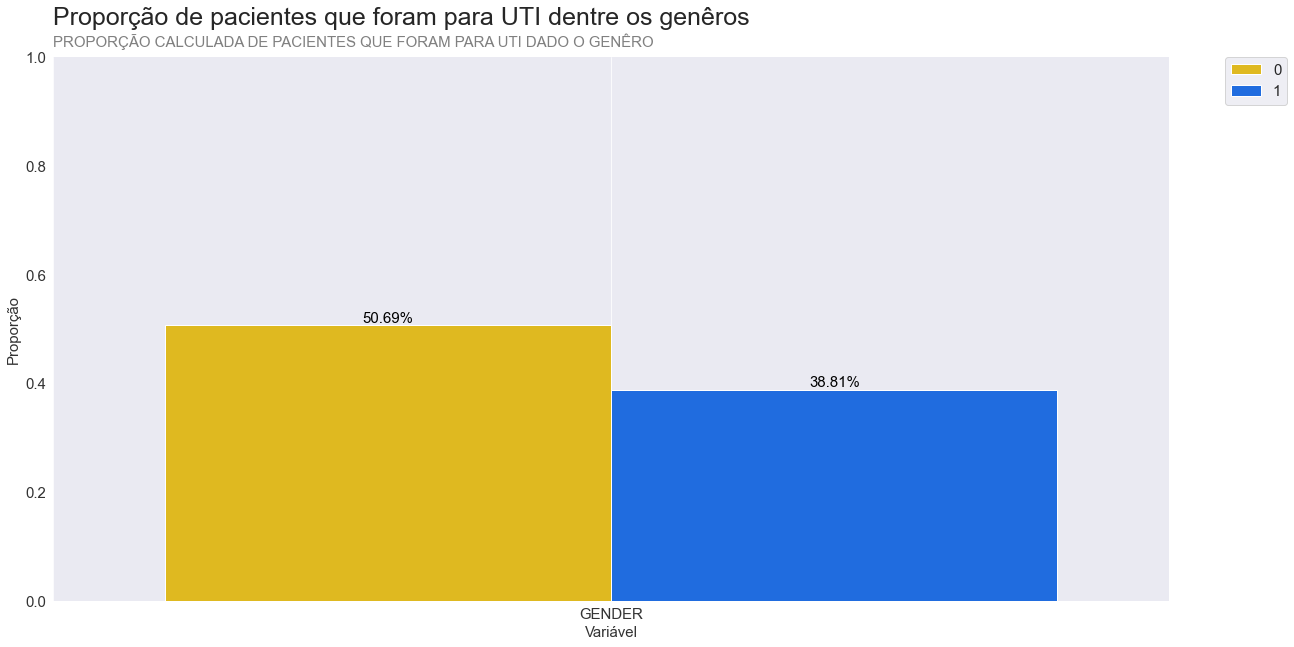

In [19]:
fig, ax = plt.subplots(figsize=(20,10)) 

sns.barplot(data=gender_prop, y='Prop', x='variable', hue='value', ax=ax, palette=['#ffcc00','#0066ff'])
labs(title='Proporção de pacientes que foram para UTI dentre os genêros', 
     subtitle='PROPORÇÃO CALCULADA DE PACIENTES QUE FORAM PARA UTI DADO O GENÊRO',
     xlabel='Variável', ylabel='Proporção',ax=ax)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], ['0','1'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
annot_bar(gender_prop, ax)
plt.ylim([0,1])
plt.show()

In [20]:
above65_melt  = pd.melt(df[above65], id_vars='ICU')
above65_prop = above65_melt.groupby(['variable','value'])['ICU'].mean().reset_index(name='Prop')

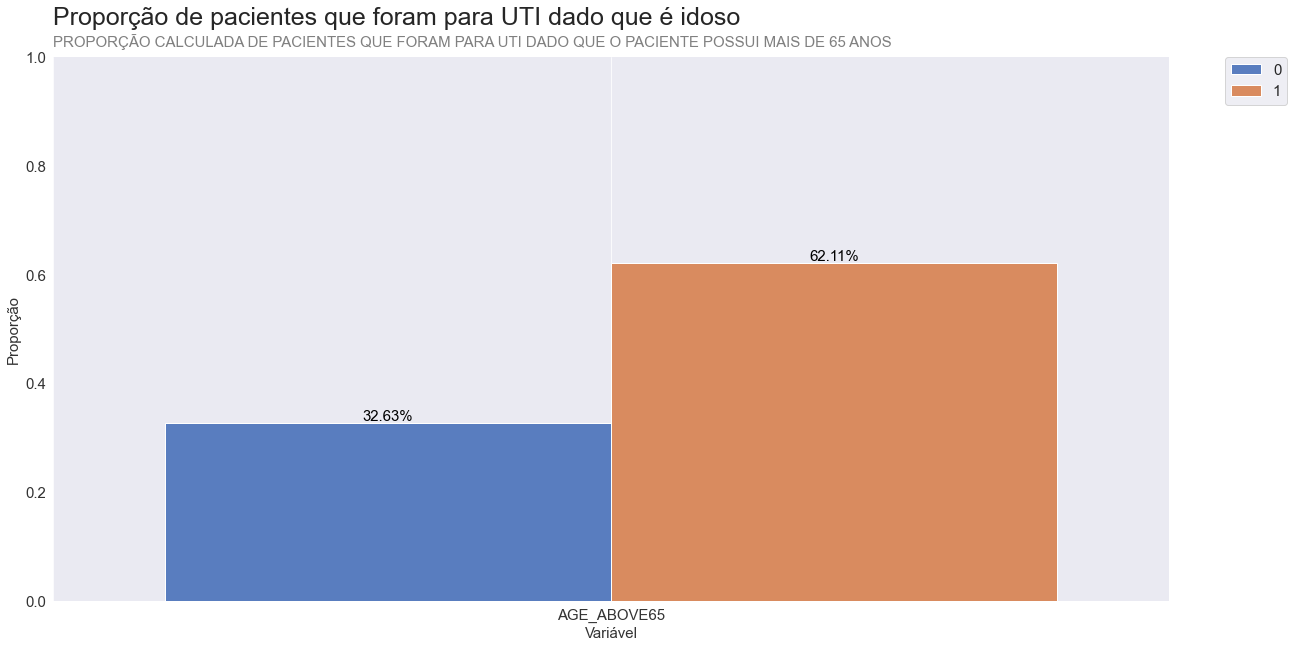

In [21]:
fig, ax = plt.subplots(figsize=(20,10)) 

sns.barplot(data=above65_prop, y='Prop', x='variable', hue='value', ax=ax, palette='muted')
labs(title='Proporção de pacientes que foram para UTI dado que é idoso', 
     subtitle='PROPORÇÃO CALCULADA DE PACIENTES QUE FORAM PARA UTI DADO QUE O PACIENTE POSSUI MAIS DE 65 ANOS',
     xlabel='Variável', ylabel='Proporção',ax=ax)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], ['0','1'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
annot_bar(above65_prop, ax)
plt.ylim([0,1])
plt.show()

### Teste de Chi2

## Análise de correção entre as variáveis

In [22]:
cor = df.corr().abs()
cor_melt = pd.melt(cor.reset_index(), id_vars='index')
#cor_melt_top = cor_melt.query('value < 1 and value > 0.75')
#cor_top = cor.loc[cor_melt_top['index'].unique(), cor_melt_top['variable'].unique()] 

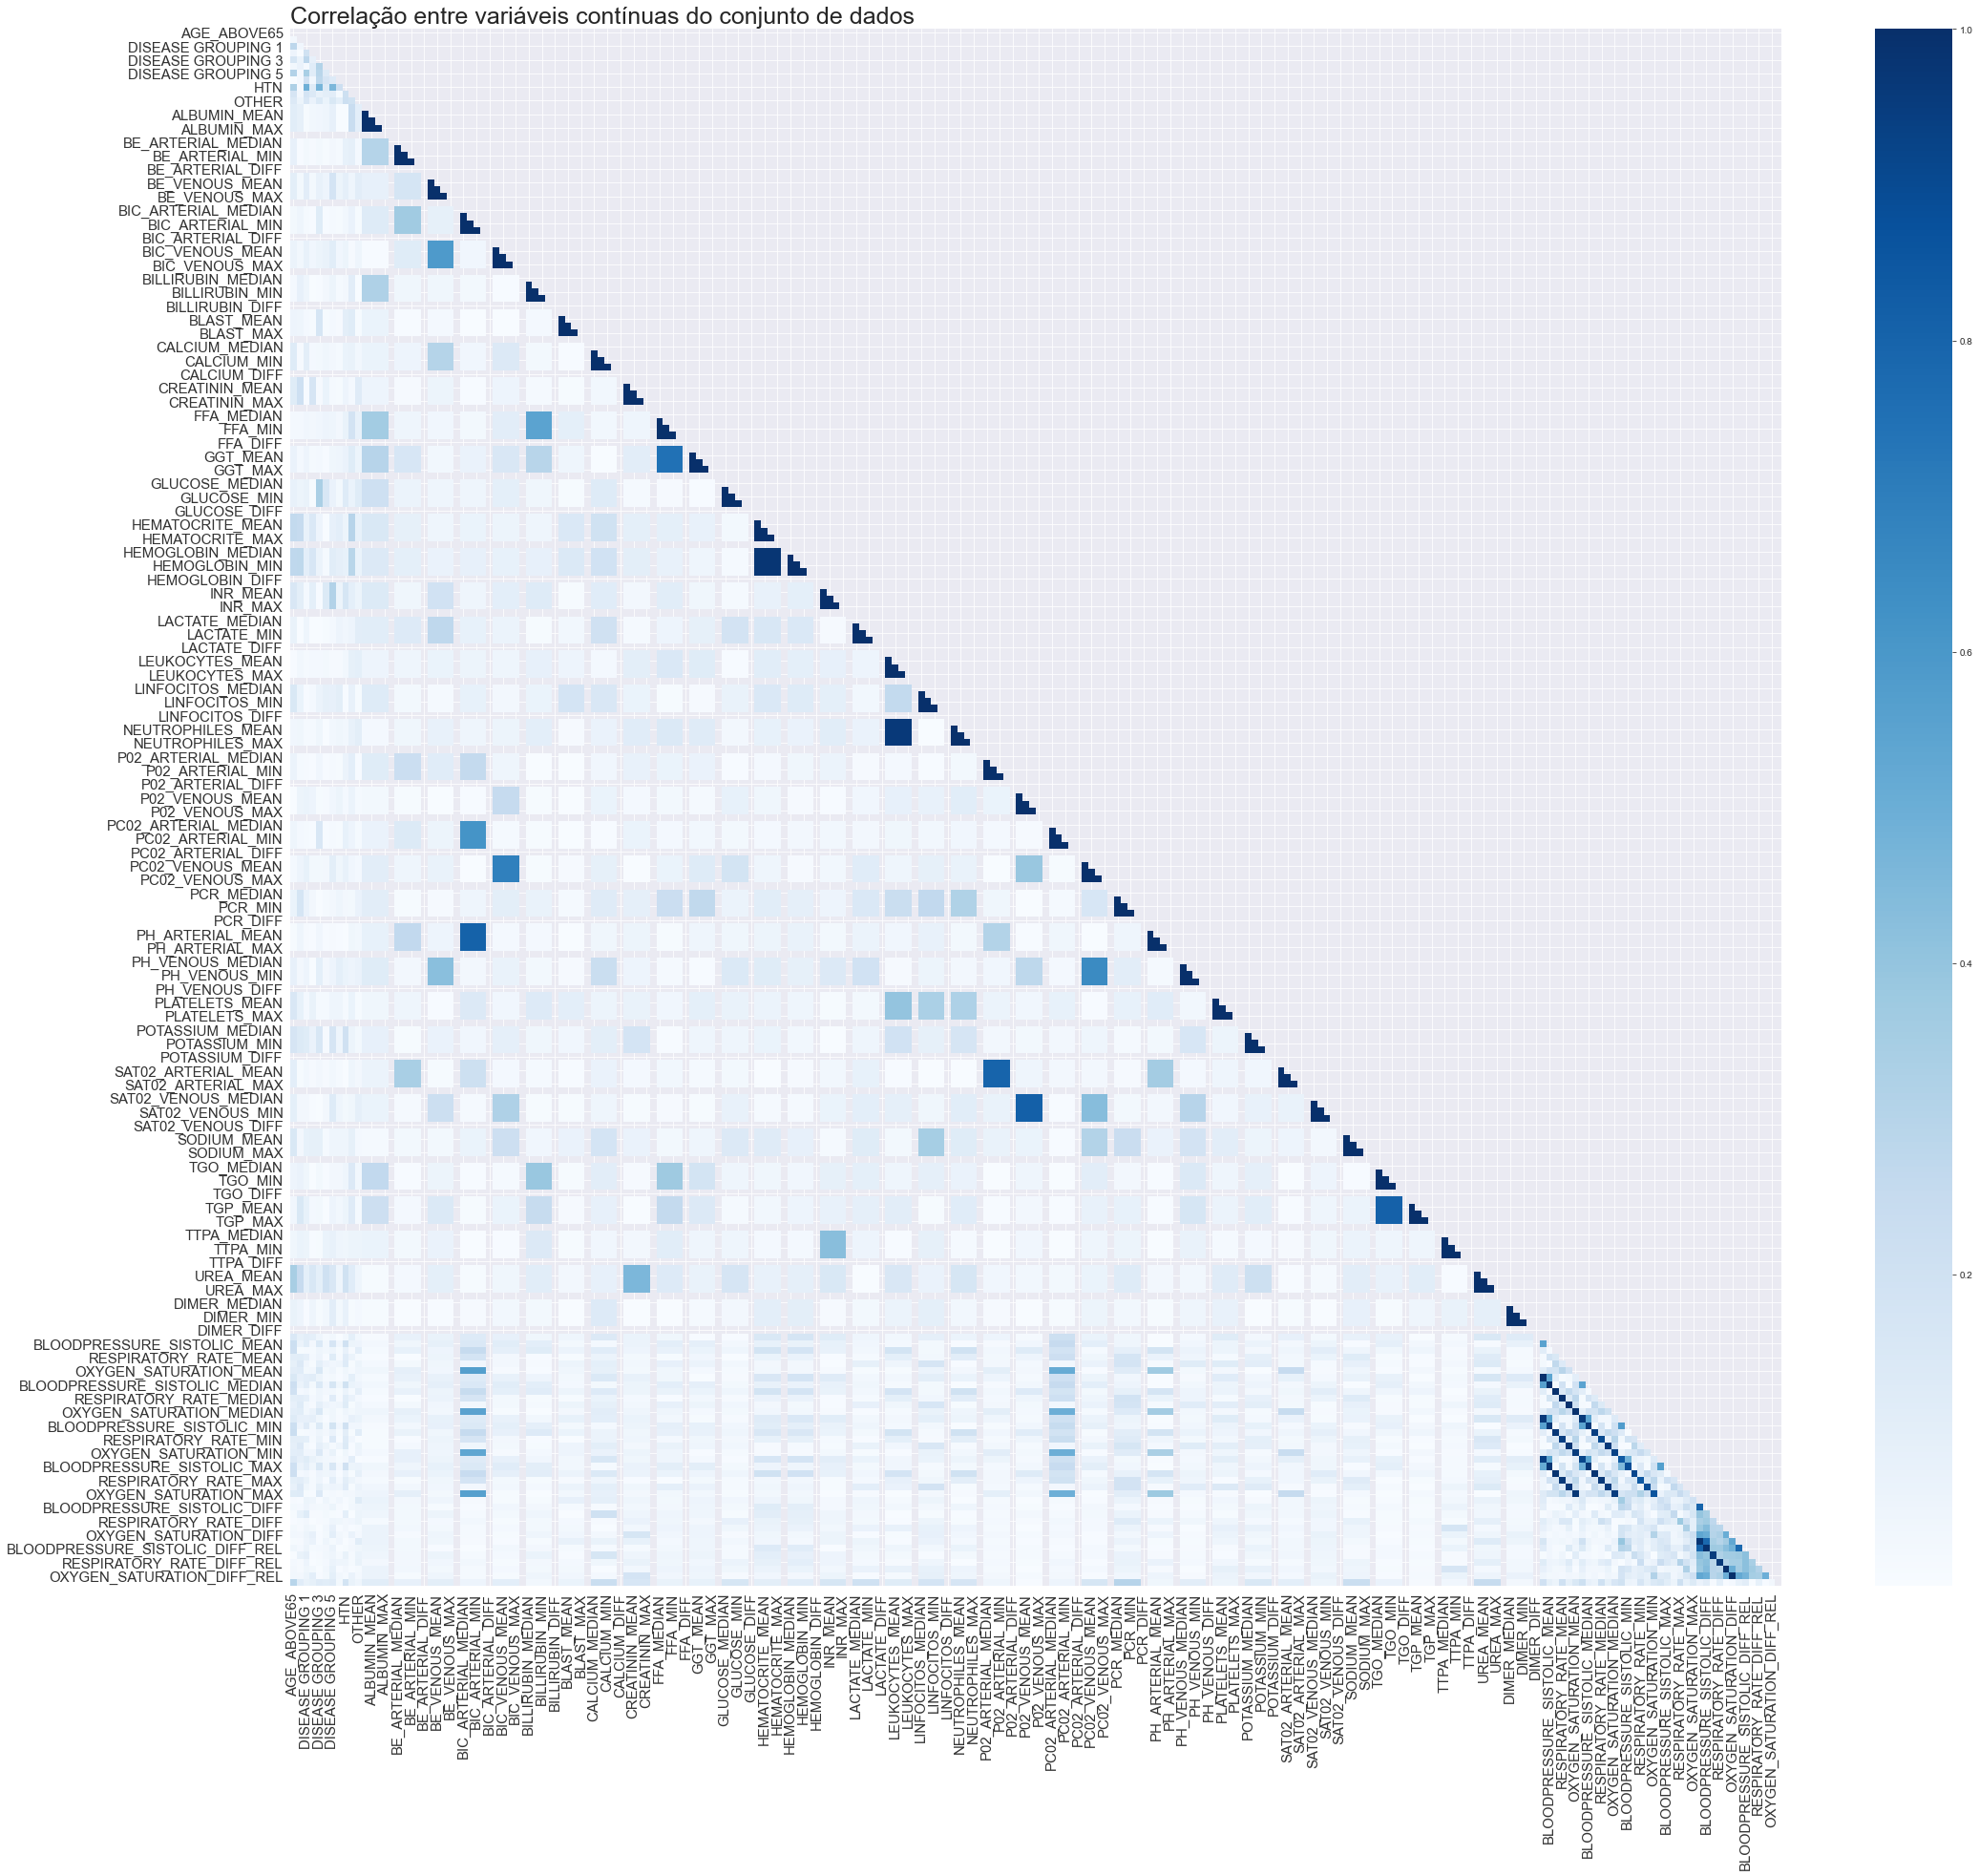

In [23]:
fig,ax = plt.subplots(figsize=(35, 30))
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor,
            cmap='Blues',
            mask=mask,
            ax=ax)
labs(title='Correlação entre variáveis contínuas do conjunto de dados', ax=ax)
plt.show()

### Teste de correlação

In [24]:
cols_high_corr = features_high_corr(df, 0.95, direc='../dados/cols_drop_txt/')

## Análise da Variância das features

In [25]:
cont = df.drop(cols_high_corr, axis=1).drop(binary_features(df), axis=1).select_dtypes('float64')
np.random.seed(8974)
sample = cont[np.random.choice(cont.columns, size=15, replace=False)]
sample_cont = pd.concat([sample,df['ICU']],axis=1) 
cont_melt = pd.melt(sample_cont, id_vars='ICU')

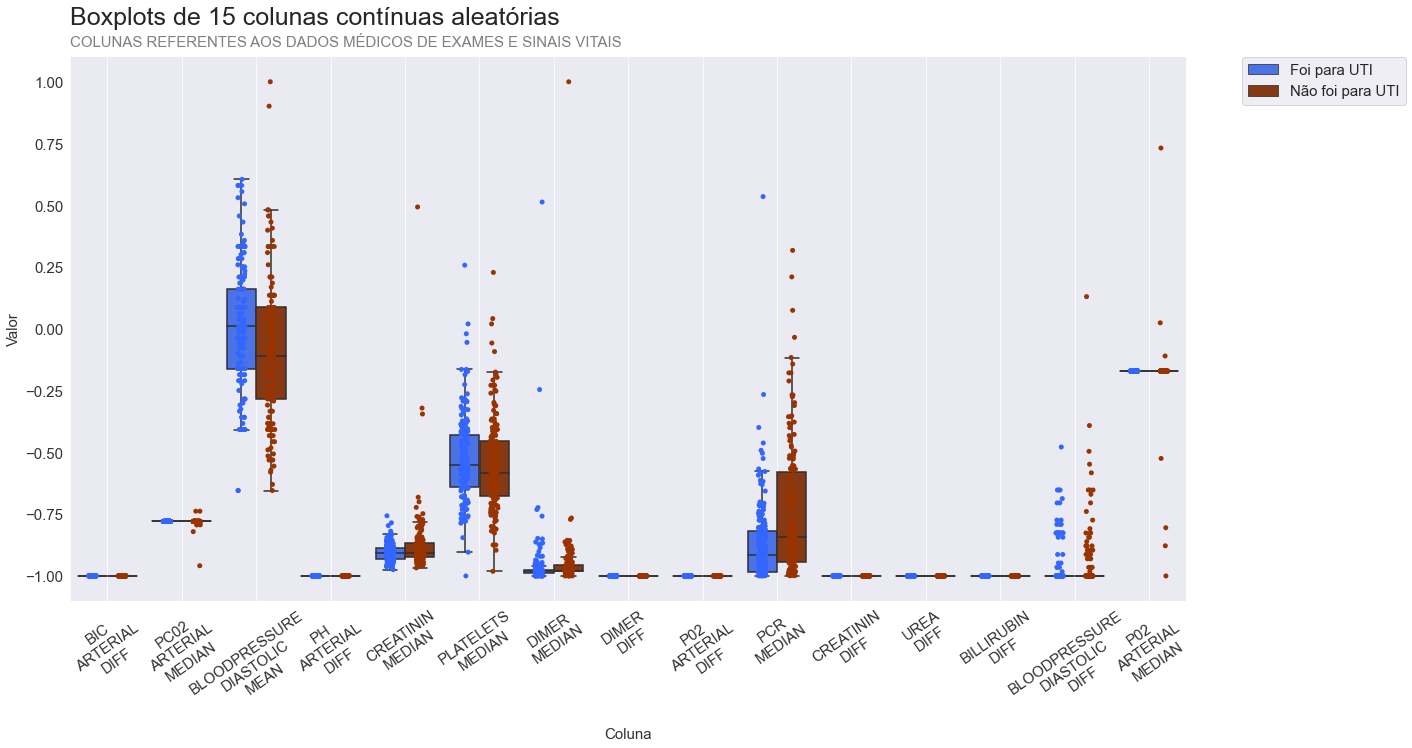

In [27]:
fig, ax = plt.subplots(figsize=(20,10))

sns.boxplot(x='variable', y='value', hue='ICU',
            data=cont_melt, palette=['#3366ff', '#993300'], 
            ax=ax, showfliers=False)
sns.stripplot(x='variable', y='value', hue='ICU',
              data=cont_melt, palette=['#3366ff', '#993300'],
              ax=ax, dodge=True)
labs(title='Boxplots de 15 colunas contínuas aleatórias', 
     xlabel='Coluna', 
     ylabel='Valor', 
     subtitle='COLUNAS REFERENTES AOS DADOS MÉDICOS DE EXAMES E SINAIS VITAIS', ax=ax)
plt.xticks(range(15),labels=cont_melt['variable'].str.split('_').str.join('\n').unique(), rotation=35)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], ['Foi para UTI', 'Não foi para UTI'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.show()

In [34]:
equal_var_mean = features_equal_var_mean(df, alpha_var=0.05)
df_equal_var_mean = df[equal_var_mean]
df_equal_var_mean.head()

,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_DIFF,BIC_ARTERIAL_DIFF,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,...,BLOODPRESSURE_DIASTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.938950,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.938950,...,-0.547826,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.747001,-0.756272,-1.000000,-0.961262
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.972789,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.935113,...,-1.000000,-0.923664,-0.882353,-0.952381,-0.979798,-1.000000,-0.956805,-0.870968,-0.953536,-0.980333
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.938950,...,-0.826087,-0.984733,-1.000000,-0.976190,-0.979798,-0.860870,-0.986481,-1.000000,-0.975891,-0.980129


In [37]:
equal_var_mean_melt =  pd.melt(pd.concat([df_equal_var_mean,df['ICU']],axis=1), id_vars='ICU')
equal_var_mean_melt.head()

,ICU,variable,value
0,1,ALBUMIN_DIFF,-1.0
1,1,ALBUMIN_DIFF,-1.0
2,0,ALBUMIN_DIFF,-1.0
3,0,ALBUMIN_DIFF,-1.0
4,0,ALBUMIN_DIFF,-1.0


In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

sns.boxplot(x='variable', y='value', hue='ICU',
            data=equal_var_mean_melt, palette=['#3366ff', '#993300'], 
            ax=ax, showfliers=False)
sns.stripplot(x='variable', y='value', hue='ICU',
              data=equal_var_mean_melt, palette=['#3366ff', '#993300'],
              ax=ax, dodge=True)
labs(title='Boxplots de 15 colunas contínuas aleatórias', 
     xlabel='Coluna', 
     ylabel='Valor', 
     subtitle='COLUNAS REFERENTES AOS DADOS MÉDICOS DE EXAMES E SINAIS VITAIS', ax=ax)
#plt.xticks(range(15),labels=equal_var_mean_melt['variable'].str.split('_').str.join('\n').unique(), rotation=35)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], ['Foi para UTI', 'Não foi para UTI'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.show()

In [29]:
features_equal_var_mean(df, alpha_var=0.05)

['ALBUMIN_DIFF',
 'BE_ARTERIAL_MEDIAN',
 'BE_ARTERIAL_MEAN',
 'BE_ARTERIAL_MIN',
 'BE_ARTERIAL_MAX',
 'BE_ARTERIAL_DIFF',
 'BE_VENOUS_DIFF',
 'BIC_ARTERIAL_DIFF',
 'BIC_VENOUS_DIFF',
 'BILLIRUBIN_MEDIAN',
 'BILLIRUBIN_MEAN',
 'BILLIRUBIN_MIN',
 'BILLIRUBIN_MAX',
 'BILLIRUBIN_DIFF',
 'BLAST_MEDIAN',
 'BLAST_MEAN',
 'BLAST_MIN',
 'BLAST_MAX',
 'BLAST_DIFF',
 'CALCIUM_DIFF',
 'CREATININ_DIFF',
 'FFA_MEDIAN',
 'FFA_MEAN',
 'FFA_MIN',
 'FFA_MAX',
 'FFA_DIFF',
 'GGT_MEDIAN',
 'GGT_MEAN',
 'GGT_MIN',
 'GGT_MAX',
 'GGT_DIFF',
 'GLUCOSE_DIFF',
 'HEMATOCRITE_MEDIAN',
 'HEMATOCRITE_MEAN',
 'HEMATOCRITE_MIN',
 'HEMATOCRITE_MAX',
 'HEMATOCRITE_DIFF',
 'HEMOGLOBIN_DIFF',
 'INR_DIFF',
 'LACTATE_DIFF',
 'LEUKOCYTES_DIFF',
 'LINFOCITOS_DIFF',
 'NEUTROPHILES_DIFF',
 'P02_ARTERIAL_DIFF',
 'P02_VENOUS_DIFF',
 'PC02_ARTERIAL_MEDIAN',
 'PC02_ARTERIAL_MEAN',
 'PC02_ARTERIAL_MIN',
 'PC02_ARTERIAL_MAX',
 'PC02_ARTERIAL_DIFF',
 'PC02_VENOUS_DIFF',
 'PCR_DIFF',
 'PH_ARTERIAL_MEDIAN',
 'PH_ARTERIAL_MEAN',
 'PH_AR